
Detection of Fraud  in Financial Transactions using Deep Autoencoder Networks



In [1]:
# importing utilities
import os
import sys
from datetime import datetime

# importing data science libraries
import pandas as pd
import random as rd
import numpy as np

# importing pytorch libraries
import torch
from torch import nn
from torch import autograd
from torch.utils.data import DataLoader

# import visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image, display
sns.set_style('darkgrid')

# ignore potential warnings
import warnings
warnings.filterwarnings("ignore")

#Preprocessing data - standardisation 
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('C:/Users/Taipa Huchu/Desktop/Docs/Fraud Detection/Adveserial/fd-autoencoder-master/fd-autoencoder-master/data/data/creditcard.csv')

In [3]:
data.shape

(284807, 31)

In [4]:
data[data['Class']==1].shape

(492, 31)

In [5]:
data[data['Class']==0].iloc[0:7000,:].shape

(7000, 31)

In [6]:
df1=data[data['Class']==1]
df2=data[data['Class']==0].iloc[0:7000,:]
data=pd.concat([df1,df2],axis=0)
data.shape

(7492, 31)

In [7]:
data=pd.concat([df1,df2],axis=0)

In [8]:
data.pop('Time')


541      406.0
623      472.0
4920    4462.0
6108    6986.0
6329    7519.0
         ...  
7020    9203.0
7021    9204.0
7022    9205.0
7023    9207.0
7024    9207.0
Name: Time, Length: 7492, dtype: float64

In [9]:
data.shape

(7492, 30)

In [10]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


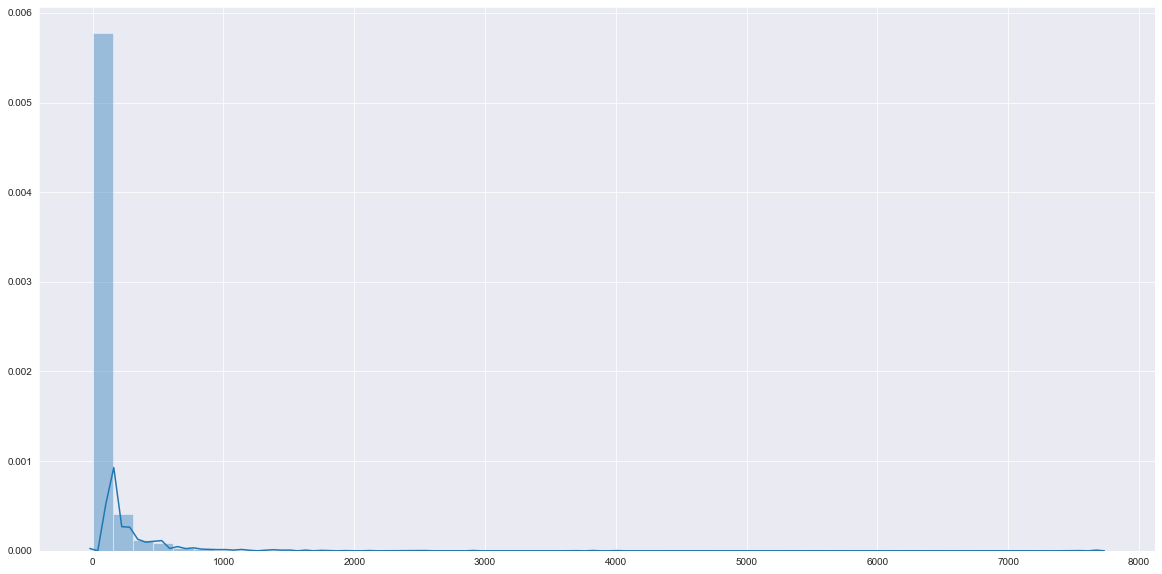

In [11]:
plt.figure(figsize=(20,10))
sns.distplot(pd.DataFrame(data.Amount))
#The distribution is positively skewed and a log tranformation and a min_max scaling will be down

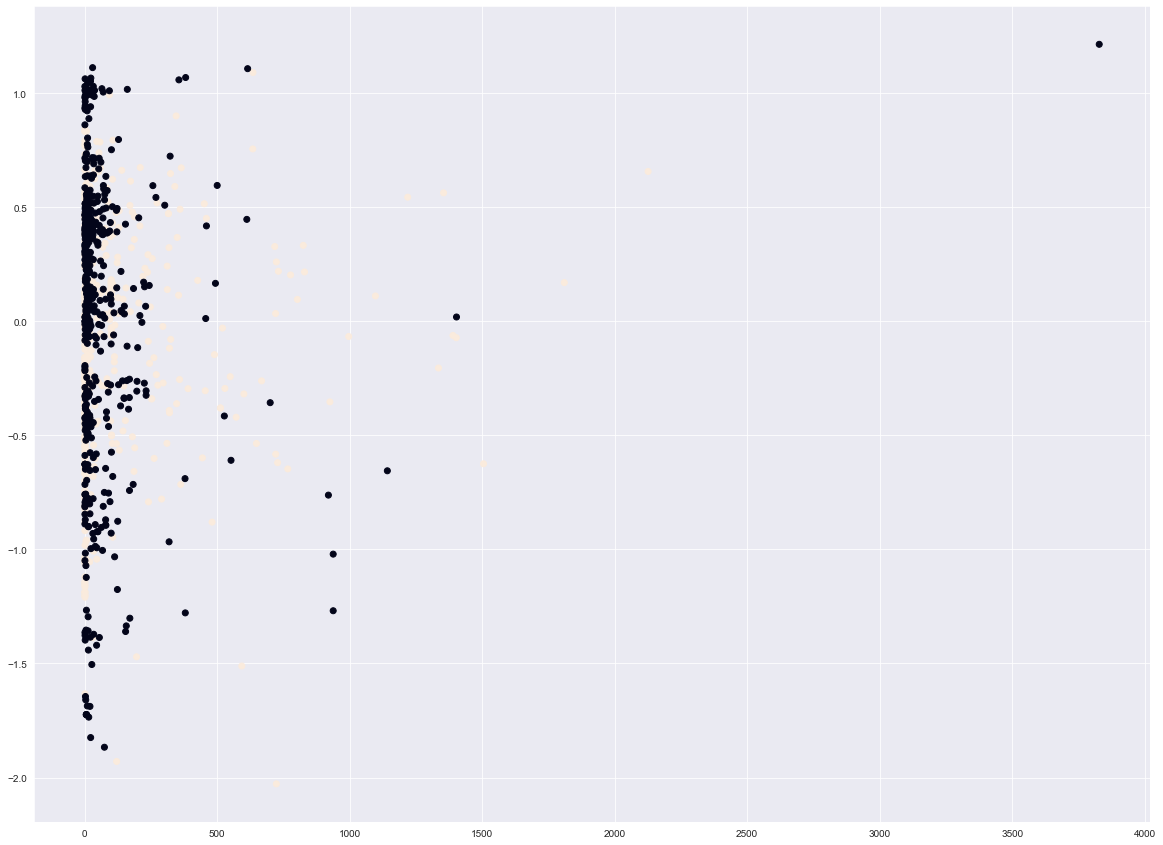

In [12]:
plt.figure(figsize=(20,15))
plt.scatter(data['Amount'][:1000],data['V24'][:1000],c=data['Class'][:1000])  

In [13]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

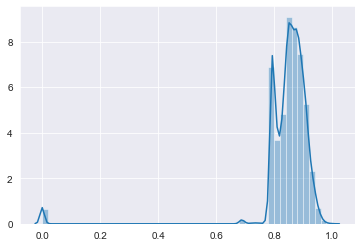

In [14]:
#Adding a small number to prevent NAN on log(0)
data['Amount']=data['Amount']+1e-15
#apply a log transformation 
data['Amount']=data['Amount'].apply(np.log)
# min- max normalisation
data['Amount']=(data['Amount']-data['Amount'].min())/(data['Amount'].max()-data['Amount'].min())
sns.distplot(data['Amount'].to_list())

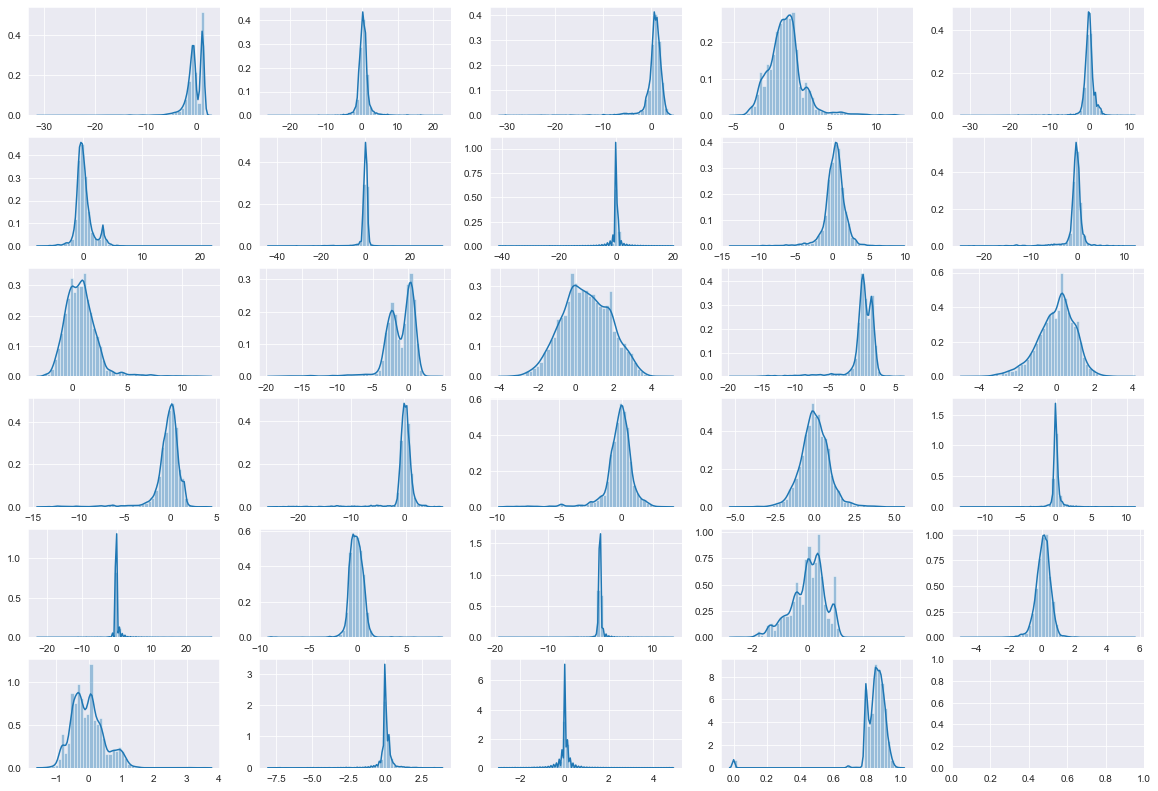

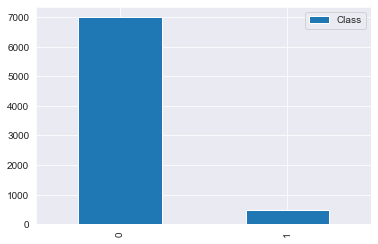

In [15]:
# Plotting the attributes
import seaborn as sns
fig,ax=plt.subplots(6,5)
fig.set_figwidth(20)
fig.set_figheight(14)
sns.distplot(data['V1'].to_list(),ax=ax[0,0])
sns.distplot(data['V2'].to_list(),ax=ax[0,1])
sns.distplot(data['V3'].to_list(),ax=ax[0,2])
sns.distplot(data['V4'].to_list(),ax=ax[0,3])
sns.distplot(data['V5'].to_list(),ax=ax[0,4])
sns.distplot(data['V6'].to_list(),ax=ax[1,0])
sns.distplot(data['V7'].to_list(),ax=ax[1,1])
sns.distplot(data['V8'].to_list(),ax=ax[1,2])
sns.distplot(data['V9'].to_list(),ax=ax[1,3])
sns.distplot(data['V10'].to_list(),ax=ax[1,4])
sns.distplot(data['V11'].to_list(),ax=ax[2,0])
sns.distplot(data['V12'].to_list(),ax=ax[2,1])
sns.distplot(data['V13'].to_list(),ax=ax[2,2])
sns.distplot(data['V14'].to_list(),ax=ax[2,3])
sns.distplot(data['V15'].to_list(),ax=ax[2,4])
sns.distplot(data['V16'].to_list(),ax=ax[3,0])
sns.distplot(data['V17'].to_list(),ax=ax[3,1])
sns.distplot(data['V18'].to_list(),ax=ax[3,2])
sns.distplot(data['V19'].to_list(),ax=ax[3,3])
sns.distplot(data['V20'].to_list(),ax=ax[3,4])
sns.distplot(data['V21'].to_list(),ax=ax[4,0])
sns.distplot(data['V22'].to_list(),ax=ax[4,1])
sns.distplot(data['V23'].to_list(),ax=ax[4,2])
sns.distplot(data['V24'].to_list(),ax=ax[4,3])
sns.distplot(data['V25'].to_list(),ax=ax[4,4])
sns.distplot(data['V26'].to_list(),ax=ax[5,0])
sns.distplot(data['V27'].to_list(),ax=ax[5,1])
sns.distplot(data['V28'].to_list(),ax=ax[5,2])
sns.distplot(data['Amount'].to_list(),ax=ax[5,3])
ax[5,4]=pd.DataFrame(data['Class'].value_counts()).plot.bar()


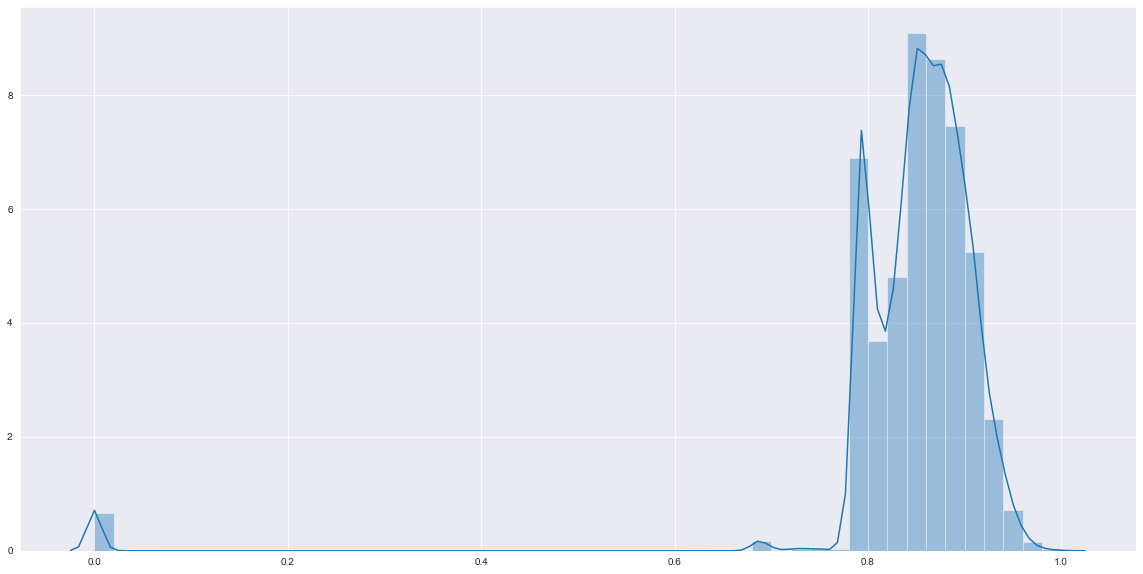

In [16]:
plt.figure(figsize=(20,10))
sns.distplot(data['Amount'].to_list())

In [17]:
data['Amount']=data['Amount']+1e-7
data['Amount']=data['Amount'].apply(np.log)

In [18]:
data['Amount'].describe()

count    7.492000e+03
mean    -3.678289e-01
std      1.832734e+00
min     -1.611810e+01
25%     -1.910809e-01
50%     -1.524752e-01
75%     -1.184279e-01
max      1.000000e-07
Name: Amount, dtype: float64

In [19]:
data['Amount']=(data['Amount']-data['Amount'].min())/(data['Amount'].max()-data['Amount'].min())

In [20]:
data['Amount'].describe()

count    7492.000000
mean        0.977179
std         0.113707
min         0.000000
25%         0.988145
50%         0.990540
75%         0.992652
max         1.000000
Name: Amount, dtype: float64

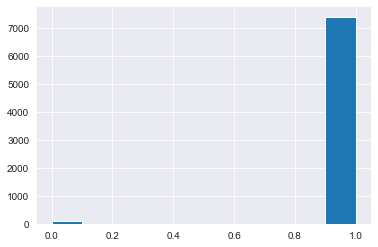

In [21]:
data['Amount'].hist()

In [22]:
data.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.996054,1


In [23]:
Class=data.pop('Class')


In [24]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [25]:
data.shape

(7492, 29)

Autoencoder Neural Network Implementation

For the encoder, network consisting of five fully-connected 


In [26]:
# The network consist 5 fully connected layers. The encoder is specified by the following number of neurons per layer
# 30-16-8-4-2 
# The first layer consists of 31 neurons (specified by the dimensionality of the input data) 

class encoder(nn.Module):
    
    def __init__(self):
        
        super(encoder,self).__init__()
        
        #specify layer 1 in 29 , out 16
        self.encoder_L1 = nn.Linear(in_features=data.shape[1], out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights 
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity 
        
        #specify layer 2 in 16 , out 8
        self.encoder_L2 = nn.Linear(in_features=16, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L2.weight) # init weights 
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity 
        
        #specify layer 3 in 8 , out 4
        self.encoder_L3 = nn.Linear(in_features=8, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L3.weight) # init weights 
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity 
        
        #specify layer 4 in 4 , out 2
        self.encoder_L4 = nn.Linear(in_features=4, out_features=2, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L4.weight) # init weights 
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity 
        
        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0.0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.encoder_L4(x)) # don't apply dropout to the AE bottleneck

        return x


In [27]:
# The network consist 5 fully connected layers. The encoder is specified by the following number of neurons per layer
# 2-4-8-16-30
# The first layer consists of 2 neurons (specified by the dimensionality of the input data latent variable z) 


class decoder(nn.Module):
    
    def __init__(self):
        
        super(decoder, self).__init__()
                
         #specify layer 1 in 2 , out 4
        self.decoder_L1 = nn.Linear(in_features=2, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight) # init weights 
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity    
        
         
        #specify layer 2 in 4 , out 8
        self.decoder_L2 = nn.Linear(in_features=4, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight) # init weights 
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity      
        
         #specify layer 3 in 8 , out 16
        self.decoder_L3 = nn.Linear(in_features=8, out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight) # init weights 
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity        
        
        #specify layer 4 in 16 , out 29
        self.decoder_L4 = nn.Linear(in_features=16, out_features=data.shape[1], bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L4.weight) # init weights 
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity 
        
         # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0.0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.decoder_L4(x)) # don't apply dropout to the AE bottleneck

        return x

In [28]:
# print the initialized architectures
encoder_train = encoder()

# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] encoder architecture:\n\n{}\n'.format(now, encoder_train))

[LOG 20200121-09:00:56] encoder architecture:

encoder(
  (encoder_L1): Linear(in_features=29, out_features=16, bias=True)
  (encoder_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L2): Linear(in_features=16, out_features=8, bias=True)
  (encoder_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L3): Linear(in_features=8, out_features=4, bias=True)
  (encoder_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L4): Linear(in_features=4, out_features=2, bias=True)
  (encoder_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (dropout): Dropout(p=0.0, inplace=True)
)



In [29]:
# init training network classes / architectures
decoder_train = decoder()
   
# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] decoder architecture:\n\n{}\n'.format(now, decoder_train))

[LOG 20200121-09:00:56] decoder architecture:

decoder(
  (decoder_L1): Linear(in_features=2, out_features=4, bias=True)
  (decoder_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L2): Linear(in_features=4, out_features=8, bias=True)
  (decoder_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L3): Linear(in_features=8, out_features=16, bias=True)
  (decoder_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L4): Linear(in_features=16, out_features=29, bias=True)
  (decoder_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (dropout): Dropout(p=0.0, inplace=True)
)



In [30]:
# define the optimization criterion / loss function
loss_function = nn.BCEWithLogitsLoss(reduction='mean')


In [31]:
# define learning rate and optimization strategy
learning_rate = 1e-3
encoder_optimizer = torch.optim.Adam(encoder_train.parameters(), lr=learning_rate)
decoder_optimizer = torch.optim.Adam(decoder_train.parameters(), lr=learning_rate)

Training the Autoencoder Neural Network (AENN) Model

In this section, we will train our deep autoencoder neural network using the encoded 
transactional data. More specifically, we will have a detailed look into the distinct 
training steps as well as how to monitor the training progress.

Preparing the Network Training

We have pre-processed the dataset, implemented the AENN and defined the reconstruction error. Let's now start to train a
corresponding model for 5 epochs and a mini-batch size of  128 entries per batch. This implies that the whole dataset
will be fed to the AENN 5 times in chunks of 128 journal entries 
yielding to 2,225 mini-batches (284807 entries / 128 journal entries per mini-batch) per epoch.

In [32]:
# specify training parameters
num_epochs = 5
mini_batch_size = 128

In [33]:
# convert pre-processed data to pytorch tensor
torch_dataset = torch.from_numpy(data.values).float()

# convert to pytorch tensor 
dataloader = DataLoader(torch_dataset, batch_size=mini_batch_size, shuffle=True, num_workers=0)
# note: we set num_workers to zero to retrieve deterministic results




reconstruction_loss.backward() computes the gradients based on the magnitude of the reconstruction loss,
encoder_optimizer.step() and decoder_optimizer.step() updates the network parameters based on the gradient

In addition, after each training epoch we want to save a checkpoint for both the actual encoder and decoder model. The saved model checkpoints contain a snapshot of the trained model parameter values upon completion of a training epoch. In general, it is good practice, to save checkpoints at regular intervals during training. In case your system crashes during training you are able continue from the last checkpoint rather than start over from scratch.
torch.save(): saves a checkpoint of the actual encoder and decoder model parameter values to disc.

In [34]:
# init collection of mini-batch losses
losses = []

# convert encoded transactional data to torch Variable
data = autograd.Variable(torch_dataset)

# train autoencoder model
for epoch in range(num_epochs):

    # init mini batch counter
    mini_batch_count = 0
    
    # set networks in training mode (apply dropout when needed)
    encoder_train.train()
    decoder_train.train()

    # start timer
    start_time = datetime.now()
        
    # iterate over all mini-batches
    for mini_batch_data in dataloader:

        # increase mini batch counter
        mini_batch_count += 1

        # convert mini batch to torch variable
        mini_batch_torch = autograd.Variable(mini_batch_data)

        # =================== (1) forward pass ===================================

        # run forward pass
        z_representation = encoder_train(mini_batch_torch) # encode mini-batch data
        mini_batch_reconstruction = decoder_train(z_representation) # decode mini-batch data
        
        # =================== (2) compute reconstruction loss ====================

        # determine reconstruction loss
        reconstruction_loss = loss_function(mini_batch_reconstruction, mini_batch_torch)
        
        # =================== (3) backward pass ==================================

        # reset graph gradients
        decoder_optimizer.zero_grad()
        encoder_optimizer.zero_grad()

        # run backward pass
        reconstruction_loss.backward()
        
        # =================== (4) update model parameters ========================

        # update network parameters
        decoder_optimizer.step()
        encoder_optimizer.step()

        # =================== monitor training progress ==========================

        # print training progress each 1'000 mini-batches
        if mini_batch_count % 1000 == 0:
            
            
            # print mini batch reconstuction results
            now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
            end_time = datetime.now() - start_time
            print('[LOG {}] training status, epoch: [{:04}/{:04}], batch: {:04}, loss: {}, mode: {}, time required: {}'.format(now, (epoch+1), num_epochs, mini_batch_count, np.round(reconstruction_loss.item(), 4), mode, end_time))

            # reset timer
            start_time = datetime.now()

    # =================== evaluate model performance =============================
    
    # set networks in evaluation mode (don't apply dropout)
    encoder_train.eval()
    decoder_train.eval()

    # reconstruct encoded transactional data
    reconstruction = decoder_train(encoder_train(data))
    
    # determine reconstruction loss - all transactions
    reconstruction_loss_all = loss_function(reconstruction, data)
            
    # collect reconstruction loss
    losses.extend([reconstruction_loss_all.item()])
    
    # print reconstuction loss results
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] training status, epoch: [{:04}/{:04}], loss: {:.10f}'.format(now, (epoch+1), num_epochs, reconstruction_loss_all.item()))

   

[LOG 20200121-09:00:57] training status, epoch: [0001/0005], loss: 0.4831033945
[LOG 20200121-09:00:58] training status, epoch: [0002/0005], loss: -4.5458812714
[LOG 20200121-09:00:59] training status, epoch: [0003/0005], loss: -133.2610473633
[LOG 20200121-09:01:00] training status, epoch: [0004/0005], loss: -1907.0000000000
[LOG 20200121-09:01:01] training status, epoch: [0005/0005], loss: -16625.8203125000



Let's now evaluate if the loss function is indeed going down with progressing training of the model. Therefore, let's visualize the magnitudes of the losses obtained per training epoch:

Text(0.5, 1.0, 'AENN training performance')

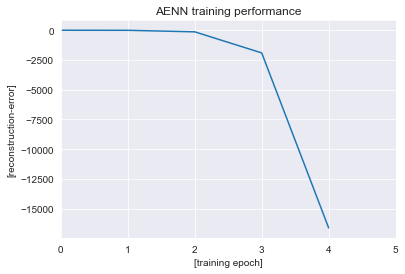

In [35]:
# plot the training progress
plt.plot(range(0, len(losses)), losses)
plt.xlabel('[training epoch]')
plt.xlim([0, len(losses)])
plt.ylabel('[reconstruction-error]')
#plt.ylim([0.0, 1.0])
plt.title('AENN training performance')

In [36]:
# determine reconstruction loss - all transactions
reconstruction_loss_all = loss_function(reconstruction, data)

# print reconstruction loss - all transactions
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] collected reconstruction loss of: {:06}/{:06} transactions'.format(now, reconstruction.size()[0], reconstruction.size()[0]))
print('[LOG {}] reconstruction loss: {:.10f}'.format(now, reconstruction_loss_all.item()))

[LOG 20200121-09:01:02] collected reconstruction loss of: 007492/007492 transactions
[LOG 20200121-09:01:02] reconstruction loss: -16625.8203125000



6.2 Assessment of the Individual Transactions

Ok, now that we are convinced that the pre-trained model is of decent quality let's assess the individual journal entries of the dataset. To achieve this, we collect the reconstruction errors of each individual journal entry by executing the cell below:

In [37]:
# init binary cross entropy errors
reconstruction_loss_transaction = np.zeros(reconstruction.size()[0])

# iterate over all detailed reconstructions
for i in range(0, reconstruction.size()[0]):

    # determine reconstruction loss - individual transactions
    reconstruction_loss_transaction[i] = loss_function(reconstruction[i], data[i]).item()

    if(i % 100000 == 0):

        ### print conversion summary
        now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
        print('[LOG {}] collected individual reconstruction loss of: {:06}/{:06} transactions'.format(now, i, reconstruction.size()[0]))
        

[LOG 20200121-09:01:02] collected individual reconstruction loss of: 000000/007492 transactions


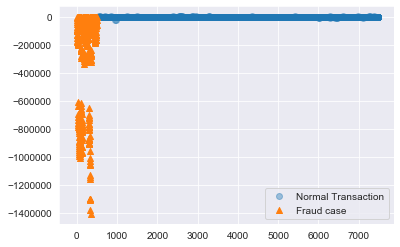

In [38]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# assign unique id to transactions
plot_data = np.column_stack((np.arange(len(reconstruction_loss_transaction)), reconstruction_loss_transaction))

# obtain regular transactions as well as global and local anomalies
regular_data = plot_data[Class == 0]
global_outliers = plot_data[Class == 1]


# plot reconstruction error scatter plot
ax.scatter(regular_data[:, 0], regular_data[:, 1], c='C0', alpha=0.4, marker="o", label='Normal Transaction') # plot regular transactions
ax.scatter(global_outliers[:, 0], global_outliers[:, 1], c='C1', marker="^", label='Fraud case') # plot global outliers


# add plot legend of transaction classes
ax.legend(loc='best')


The visualization reveals that the pre-trained model is able to reconstruct the majority of regular journal entries, while failing to do so, for the anomalous ones. As a result, the model reconstruction error can be used to distinguish both "global" anomalies (orange) and "local" anomalies (green) from the regular journal entries (blue).
To further investigate our observation and confirm the initial assumption, let's have a closer look into the journal entries exhibiting a "high" binary cross-entropy reconstruction error >= 0.1. We assume that these journal entries correspond to the "global" anomalies of the original dataset:

In [39]:
r=pd.DataFrame(reconstruction_loss_transaction)

In [40]:
r.shape

(7492, 1)

In [41]:
Class=pd.DataFrame(Class)
Class.shape

(7492, 1)

In [51]:
Class=Class.reset_index()

In [53]:
d=pd.concat([Class,r],axis=1)


,index,Class,0
0,541,1,-38304.175781
1,623,1,852.384277
2,4920,1,-25236.701172
3,6108,1,-154017.765625
4,6329,1,-6247.114258
...,...,...,...
7487,7020,0,236.552048
7488,7021,0,14.056471
7489,7022,0,226.924988
7490,7023,0,69.312965


In [54]:
d.columns=['index','Class','Loss']

In [55]:
d.head()

,index,Class,Loss
0,541,1,-38304.175781
1,623,1,852.384277
2,4920,1,-25236.701172
3,6108,1,-154017.765625
4,6329,1,-6247.114258


In [89]:
e=d[d['Loss']<-1570]
e.shape

(492, 3)

In [67]:
Class[Class['Class']==1].shape

(492, 2)

In [90]:
d.loc[d['Loss']<-1570,'y_pred']=1
d.loc[d['Loss']>=-1570,'y_pred']=0
d

,index,Class,Loss,y_pred
0,541,1,-38304.175781,1.0
1,623,1,852.384277,0.0
2,4920,1,-25236.701172,1.0
3,6108,1,-154017.765625,1.0
4,6329,1,-6247.114258,1.0
...,...,...,...,...
7487,7020,0,236.552048,0.0
7488,7021,0,14.056471,0.0
7489,7022,0,226.924988,0.0
7490,7023,0,69.312965,0.0


In [91]:
from sklearn.metrics import f1_score
f1=f1_score(d['Class'],d['y_pred'])
print('Whaaaaa this is the f1 score I have found: {}'.format(f1))

Whaaaaa this is the f1 score I have found: 0.8313008130081302
